In [34]:
import pandas as pd
import numpy as np

maternal_mortality = pd.read_csv('Data Sets - Maternal Mortality.csv')
beating_justification = pd.read_csv('Data Sets - Beating Justification.csv')
contraceptive_prevalence = pd.read_csv('Data Sets - Contraceptive Prevalence.csv')

In [37]:
mmcp_2000 = pd.merge(maternal_mortality[['Country', '2000']],
                contraceptive_prevalence[['Country', '2000']],
                on='Country')

# mmbj_2005 = pd.merge(maternal_mortality[['Country', '2005']],
#                 beating_justification[['Country', '2005']],
#                 on='Country')

all_2005 = pd.merge(maternal_mortality[['Country', '2005']],
                contraceptive_prevalence[['Country', '2005']],
                on='Country')

bjcp_2006 = pd.merge(beating_justification[['Country', '2006']],
                contraceptive_prevalence[['Country', '2006']],
                on='Country')

# mmbj_2010 = pd.merge(maternal_mortality[['Country', '2010']],
#                 beating_justification[['Country', '2010']],
#                 on='Country')

all_2010 = pd.merge(maternal_mortality[['Country', '2010']],
                contraceptive_prevalence[['Country', '2010']],
                on='Country')

In [38]:
# https://stackoverflow.com/questions/47060980/renaming-the-column-names-of-pandas-dataframe-is-not-working-as-expected-pytho
mmcp_2000.columns = ['Country', 'mm', 'cp']
all_2005.columns = ['Country','mm', 'cp']
bjcp_2006.columns = ['Country','bj', 'cp']
all_2010.columns = ['Country','mm', 'cp']

# https://stackoverflow.com/questions/33768122/python-pandas-dataframe-how-to-multiply-entire-column-with-a-scalar
mmcp_2000.loc[:,'mm'] /= 100000 #
all_2005.loc[:,'mm'] /= 100000
all_2010.loc[:,'mm'] /= 100000

In [4]:
# https://www.geeksforgeeks.org/saving-a-pandas-dataframe-as-a-csv/
# mmcp_2000.to_csv('combined_2000.csv')
# all_2005.to_csv('combined_2005.csv')
# bjcp_2006.to_csv('combined_2006.csv')
# all_2010.to_csv('combined_2010.csv')

In [44]:
mmcp_2000['Year'] = np.full((all_2005.shape[0],), 0)
all_2005['Year'] = np.full((all_2005.shape[0],), 0.5)
all_2010['Year'] = np.full((all_2010.shape[0],), 1)

all_data = pd.concat([mmcp_2000, all_2005, all_2010]).dropna()
# all_data.loc[:, 'bj'] /= 100
all_data.loc[:, 'cp'] /= 100

data = all_data[['cp', 'Year']]
labels = all_data['mm']

In [49]:
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt

In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Train on 96 samples, validate on 24 samples
Epoch 1/300
96/96 [==============================] - 0s 5ms/step - loss: 5.2899e-04 - mean_squared_error: 5.2899e-04 - mean_absolute_error: 0.0170 - val_loss: 2.3910e-05 - val_mean_squared_error: 2.3910e-05 - val_mean_absolute_error: 0.0037
Epoch 2/300
96/96 [==============================] - 0s 193us/step - loss: 7.2512e-05 - mean_squared_error: 7.2512e-05 - mean_absolute_error: 0.0074 - val_loss: 8.3370e-05 - val_mean_squared_error: 8.3370e-05 - val_mean_absolute_error: 0.0084
Epoch 3/300
96/96 [==============================] - 0s 268us/step - loss: 6.2847e-05 - mean_squared_error: 6.2847e-05 - mean_absolute_error: 0.0073 - val_loss: 4.5664e-05 - val_mean_squared_error: 4.5664e-05 - val_mean_absolute_error: 0.0059
Epoch 4/300
96/96 [==============================] - 0s 242us/step - loss: 4.0635e-05 - mean_squared_error: 4.0635e-05 - mean_absolute_error: 0.0053 - val_loss: 1.5567e-05 - val_mean_squared_error: 1.5567e-05 - val_mean_absolute_

96/96 [==============================] - 0s 196us/step - loss: 1.0065e-05 - mean_squared_error: 1.0065e-05 - mean_absolute_error: 0.0025 - val_loss: 1.2856e-05 - val_mean_squared_error: 1.2856e-05 - val_mean_absolute_error: 0.0030
Epoch 35/300
96/96 [==============================] - 0s 437us/step - loss: 9.7320e-06 - mean_squared_error: 9.7320e-06 - mean_absolute_error: 0.0025 - val_loss: 1.2444e-05 - val_mean_squared_error: 1.2444e-05 - val_mean_absolute_error: 0.0030
Epoch 36/300
96/96 [==============================] - 0s 700us/step - loss: 9.7571e-06 - mean_squared_error: 9.7571e-06 - mean_absolute_error: 0.0025 - val_loss: 1.2557e-05 - val_mean_squared_error: 1.2557e-05 - val_mean_absolute_error: 0.0030
Epoch 37/300
96/96 [==============================] - 0s 272us/step - loss: 9.7977e-06 - mean_squared_error: 9.7977e-06 - mean_absolute_error: 0.0025 - val_loss: 1.2476e-05 - val_mean_squared_error: 1.2476e-05 - val_mean_absolute_error: 0.0030
Epoch 38/300
96/96 [=================

Epoch 68/300
96/96 [==============================] - 0s 225us/step - loss: 1.0045e-05 - mean_squared_error: 1.0045e-05 - mean_absolute_error: 0.0026 - val_loss: 1.2345e-05 - val_mean_squared_error: 1.2345e-05 - val_mean_absolute_error: 0.0030
Epoch 69/300
96/96 [==============================] - 0s 220us/step - loss: 9.8909e-06 - mean_squared_error: 9.8909e-06 - mean_absolute_error: 0.0025 - val_loss: 1.3077e-05 - val_mean_squared_error: 1.3077e-05 - val_mean_absolute_error: 0.0030
Epoch 70/300
96/96 [==============================] - 0s 195us/step - loss: 9.9867e-06 - mean_squared_error: 9.9867e-06 - mean_absolute_error: 0.0026 - val_loss: 1.2305e-05 - val_mean_squared_error: 1.2305e-05 - val_mean_absolute_error: 0.0030
Epoch 71/300
96/96 [==============================] - 0s 233us/step - loss: 9.8516e-06 - mean_squared_error: 9.8516e-06 - mean_absolute_error: 0.0025 - val_loss: 1.2936e-05 - val_mean_squared_error: 1.2936e-05 - val_mean_absolute_error: 0.0030
Epoch 72/300
96/96 [====

96/96 [==============================] - 0s 225us/step - loss: 9.9900e-06 - mean_squared_error: 9.9900e-06 - mean_absolute_error: 0.0026 - val_loss: 1.2530e-05 - val_mean_squared_error: 1.2530e-05 - val_mean_absolute_error: 0.0030
Epoch 102/300
96/96 [==============================] - 0s 194us/step - loss: 9.8937e-06 - mean_squared_error: 9.8937e-06 - mean_absolute_error: 0.0026 - val_loss: 1.2370e-05 - val_mean_squared_error: 1.2370e-05 - val_mean_absolute_error: 0.0030
Epoch 103/300
96/96 [==============================] - 0s 156us/step - loss: 9.6959e-06 - mean_squared_error: 9.6959e-06 - mean_absolute_error: 0.0025 - val_loss: 1.2610e-05 - val_mean_squared_error: 1.2610e-05 - val_mean_absolute_error: 0.0030
Epoch 104/300
96/96 [==============================] - 0s 233us/step - loss: 9.8301e-06 - mean_squared_error: 9.8301e-06 - mean_absolute_error: 0.0025 - val_loss: 1.2565e-05 - val_mean_squared_error: 1.2565e-05 - val_mean_absolute_error: 0.0030
Epoch 105/300
96/96 [=============

96/96 [==============================] - 0s 246us/step - loss: 9.9186e-06 - mean_squared_error: 9.9186e-06 - mean_absolute_error: 0.0025 - val_loss: 1.2919e-05 - val_mean_squared_error: 1.2919e-05 - val_mean_absolute_error: 0.0030
Epoch 135/300
96/96 [==============================] - 0s 340us/step - loss: 1.0076e-05 - mean_squared_error: 1.0076e-05 - mean_absolute_error: 0.0025 - val_loss: 1.2288e-05 - val_mean_squared_error: 1.2288e-05 - val_mean_absolute_error: 0.0030
Epoch 136/300
96/96 [==============================] - 0s 211us/step - loss: 9.7491e-06 - mean_squared_error: 9.7491e-06 - mean_absolute_error: 0.0024 - val_loss: 1.3118e-05 - val_mean_squared_error: 1.3118e-05 - val_mean_absolute_error: 0.0030
Epoch 137/300
96/96 [==============================] - 0s 253us/step - loss: 9.8133e-06 - mean_squared_error: 9.8133e-06 - mean_absolute_error: 0.0025 - val_loss: 1.2392e-05 - val_mean_squared_error: 1.2392e-05 - val_mean_absolute_error: 0.0030
Epoch 138/300
96/96 [=============

96/96 [==============================] - 0s 241us/step - loss: 9.6611e-06 - mean_squared_error: 9.6611e-06 - mean_absolute_error: 0.0025 - val_loss: 1.3006e-05 - val_mean_squared_error: 1.3006e-05 - val_mean_absolute_error: 0.0030
Epoch 168/300
96/96 [==============================] - 0s 324us/step - loss: 1.0337e-05 - mean_squared_error: 1.0337e-05 - mean_absolute_error: 0.0025 - val_loss: 1.2334e-05 - val_mean_squared_error: 1.2334e-05 - val_mean_absolute_error: 0.0030
Epoch 169/300
96/96 [==============================] - 0s 286us/step - loss: 9.8870e-06 - mean_squared_error: 9.8870e-06 - mean_absolute_error: 0.0026 - val_loss: 1.2783e-05 - val_mean_squared_error: 1.2783e-05 - val_mean_absolute_error: 0.0030
Epoch 170/300
96/96 [==============================] - 0s 288us/step - loss: 9.8492e-06 - mean_squared_error: 9.8492e-06 - mean_absolute_error: 0.0025 - val_loss: 1.2776e-05 - val_mean_squared_error: 1.2776e-05 - val_mean_absolute_error: 0.0030
Epoch 171/300
96/96 [=============

96/96 [==============================] - 0s 143us/step - loss: 9.9046e-06 - mean_squared_error: 9.9046e-06 - mean_absolute_error: 0.0024 - val_loss: 1.2632e-05 - val_mean_squared_error: 1.2632e-05 - val_mean_absolute_error: 0.0030
Epoch 201/300
96/96 [==============================] - 0s 123us/step - loss: 9.9295e-06 - mean_squared_error: 9.9295e-06 - mean_absolute_error: 0.0026 - val_loss: 1.2419e-05 - val_mean_squared_error: 1.2419e-05 - val_mean_absolute_error: 0.0030
Epoch 202/300
96/96 [==============================] - 0s 122us/step - loss: 9.6585e-06 - mean_squared_error: 9.6585e-06 - mean_absolute_error: 0.0024 - val_loss: 1.3020e-05 - val_mean_squared_error: 1.3020e-05 - val_mean_absolute_error: 0.0030
Epoch 203/300
96/96 [==============================] - 0s 180us/step - loss: 9.9810e-06 - mean_squared_error: 9.9810e-06 - mean_absolute_error: 0.0025 - val_loss: 1.2748e-05 - val_mean_squared_error: 1.2748e-05 - val_mean_absolute_error: 0.0030
Epoch 204/300
96/96 [=============

96/96 [==============================] - 0s 133us/step - loss: 9.9234e-06 - mean_squared_error: 9.9234e-06 - mean_absolute_error: 0.0026 - val_loss: 1.2476e-05 - val_mean_squared_error: 1.2476e-05 - val_mean_absolute_error: 0.0030
Epoch 234/300
96/96 [==============================] - 0s 117us/step - loss: 9.7916e-06 - mean_squared_error: 9.7916e-06 - mean_absolute_error: 0.0025 - val_loss: 1.2778e-05 - val_mean_squared_error: 1.2778e-05 - val_mean_absolute_error: 0.0030
Epoch 235/300
96/96 [==============================] - 0s 129us/step - loss: 9.7006e-06 - mean_squared_error: 9.7006e-06 - mean_absolute_error: 0.0024 - val_loss: 1.2938e-05 - val_mean_squared_error: 1.2938e-05 - val_mean_absolute_error: 0.0030
Epoch 236/300
96/96 [==============================] - 0s 132us/step - loss: 9.8806e-06 - mean_squared_error: 9.8806e-06 - mean_absolute_error: 0.0025 - val_loss: 1.2564e-05 - val_mean_squared_error: 1.2564e-05 - val_mean_absolute_error: 0.0030
Epoch 237/300
96/96 [=============

96/96 [==============================] - 0s 173us/step - loss: 1.0016e-05 - mean_squared_error: 1.0016e-05 - mean_absolute_error: 0.0027 - val_loss: 1.3445e-05 - val_mean_squared_error: 1.3445e-05 - val_mean_absolute_error: 0.0030
Epoch 267/300
96/96 [==============================] - 0s 163us/step - loss: 9.9519e-06 - mean_squared_error: 9.9519e-06 - mean_absolute_error: 0.0024 - val_loss: 1.2373e-05 - val_mean_squared_error: 1.2373e-05 - val_mean_absolute_error: 0.0030
Epoch 268/300
96/96 [==============================] - 0s 148us/step - loss: 1.0238e-05 - mean_squared_error: 1.0238e-05 - mean_absolute_error: 0.0027 - val_loss: 1.3437e-05 - val_mean_squared_error: 1.3437e-05 - val_mean_absolute_error: 0.0030
Epoch 269/300
96/96 [==============================] - 0s 144us/step - loss: 1.0019e-05 - mean_squared_error: 1.0019e-05 - mean_absolute_error: 0.0024 - val_loss: 1.2368e-05 - val_mean_squared_error: 1.2368e-05 - val_mean_absolute_error: 0.0030
Epoch 270/300
96/96 [=============

96/96 [==============================] - 0s 138us/step - loss: 1.0070e-05 - mean_squared_error: 1.0070e-05 - mean_absolute_error: 0.0026 - val_loss: 1.2470e-05 - val_mean_squared_error: 1.2470e-05 - val_mean_absolute_error: 0.0030
Epoch 300/300
96/96 [==============================] - 0s 121us/step - loss: 1.1171e-05 - mean_squared_error: 1.1171e-05 - mean_absolute_error: 0.0025 - val_loss: 1.2358e-05 - val_mean_squared_error: 1.2358e-05 - val_mean_absolute_error: 0.0030


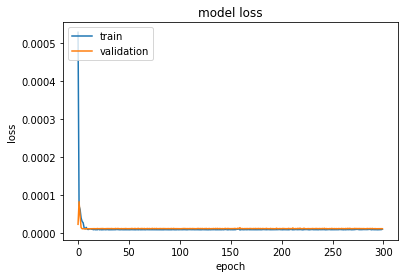

In [55]:
model = Sequential()
model.add(Dense(8, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

maternal_mortality = model.fit(X_train, y_train, epochs=300, batch_size=10,  verbose=1, validation_data=(X_test, y_test))

plt.plot(maternal_mortality.history['loss'])
plt.plot(maternal_mortality.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [51]:
for layer in model.layers:
    print(layer.get_weights())
    print(layer.output)

[array([[-0.15256122,  0.00698083, -0.00634267, -0.01930933, -0.01046262,
         0.00202101, -0.000499  ,  0.15706535, -0.02579094],
       [-0.00649393, -0.01993409, -0.00707877, -0.04215308, -0.07290714,
        -0.07192569,  0.02350776,  0.01105998, -0.11606095]],
      dtype=float32), array([ 0.05417146, -0.00757189, -0.00500946,  0.        ,  0.        ,
       -0.01618967, -0.02446463, -0.02125856, -0.00051415], dtype=float32)]
Tensor("dense_7/Relu:0", shape=(?, 9), dtype=float32)
[]
Tensor("dropout_1/cond/Merge:0", shape=(?, 9), dtype=float32)
[array([[-0.18138522,  0.66572857, -0.6203549 ],
       [ 0.39999166, -0.36772045,  0.39560097],
       [-0.5427242 ,  0.45546928,  0.5572086 ],
       [ 0.6019396 , -0.09275866, -0.54759544],
       [ 0.675005  , -0.57013476,  0.29002428],
       [-0.40190682, -0.17686015,  0.12351862],
       [ 0.14011504, -0.30499098, -0.5775211 ],
       [ 0.22523038, -0.56194997, -0.26397768],
       [-0.41776285, -0.20731165, -0.38752353]], dtype=f

In [46]:
X_train

,cp,Year
24,0.238000,0.0
81,0.306000,0.0
117,0.118000,0.5
132,0.379000,0.5
89,0.549000,1.0
0,0.049000,0.0
113,0.174127,0.5
51,0.133000,1.0
12,0.726000,0.5
113,0.132000,0.0
